In [1]:
import os
import string
import pickle
import pandas as pd
import numpy as np
import torch

In [3]:
# WMT 15

data_folder = os.path.join(os.pardir, 'data', 'wmt15', 'de-en')

mt_txt_path = os.path.join(data_folder, 'newstest2015.mt-system.de-en')
human_score_path = os.path.join(data_folder, 'newstest2015.human.de-en')
ref_txt_path = os.path.join(data_folder, 'newstest2015.reference.de-en')
bleu_score_path = os.path.join(data_folder, 'newstest2015.sbleumoses.de-en')
srs_path = os.path.join(data_folder, 'newstest2015.source.de-en')

with open(ref_txt_path) as f:
    ref_snts_15 = f.read().splitlines()

with open(srs_path) as f:
    src_snts_15 = f.read().splitlines()

with open(mt_txt_path) as f:
    mt_snts_15 = f.read().splitlines()

with open(human_score_path) as f:
    da_scores_15 = f.read().splitlines()
    da_scores_15 = [float(s) for s in da_scores_15]

with open(bleu_score_path) as f:
    sbleu_scores_15 = f.read().splitlines()
    sbleu_scores_15 = [float(s) for s in sbleu_scores_15]

In [4]:
# WMT 16

data_folder = os.path.join(os.pardir, 'data', 'wmt16')

mt_txt_path_16 = os.path.join(data_folder, 'DAseg.newstest2016.mt-system.de-en')
human_score_path_16 = os.path.join(data_folder, 'DAseg.newstest2016.human.de-en')
ref_txt_path_16 = os.path.join(data_folder, 'DAseg.newstest2016.reference.de-en')
srs_path_16 = os.path.join(data_folder, 'DAseg.newstest2016.source.de-en')

with open(ref_txt_path_16) as f:
    ref_snts_16 = f.read().splitlines()

with open(srs_path_16) as f:
    src_snts_16 = f.read().splitlines()

with open(mt_txt_path_16) as f:
    mt_snts_16 = f.read().splitlines()

with open(human_score_path_16) as f:
    da_scores_16 = f.read().splitlines()
    da_scores_16 = [float(s) for s in da_scores_16]

In [5]:
# WMT 21

wmt_data_folder = '../data/wmt21/preprocessed_data'

ref_path = os.path.join(wmt_data_folder, 'all_ref_snts_21.pickle')
mt_path = os.path.join(wmt_data_folder, 'all_mt_snts_21.pickle')
srs_path = os.path.join(wmt_data_folder, 'all_src_snts_21.pickle')
mqm_scores_path = os.path.join(wmt_data_folder, 'all_z_mqm_scores.pickle')
    
with open(ref_path, 'rb') as fp:
    ref_snts = pickle.load(fp)

with open(mt_path, 'rb') as fp:
    mt_snts = pickle.load(fp)

with open(mqm_scores_path, 'rb') as fp:
    human_scores = pickle.load(fp)

with open(srs_path, 'rb') as fp:
    src_snts = pickle.load(fp)

preproc_data_path = "../data/wmt21/preprocessed_data/wmt21_preprocessed_full_data.tsv"
full_mqm21_df = pd.read_csv(preproc_data_path, sep='\t')

In [6]:
full_mqm21_df.category.unique().tolist()

['Accuracy/Mistranslation',
 'Accuracy/Untranslated',
 'Style/Awkward',
 'Fluency/Punctuation',
 'Other',
 'Accuracy/Omission',
 'No-error',
 'Terminology/Inappropriate',
 'Fluency/Grammar',
 'Fluency/Inconsistency',
 'Fluency/Spelling',
 'Fluency/Display',
 'Fluency/Register',
 'Accuracy/Addition',
 'Source_error',
 'Terminology/Inconsistent',
 'Locale_convention/Currency',
 'Locale_convention/Date',
 'Locale_convention/Time']

In [77]:
metrics = list(set([c.split('/')[0] for c in full_mqm21_df.category.unique()]))
metrics

['Fluency',
 'Other',
 'Terminology',
 'Source_error',
 'Style',
 'No-error',
 'Locale_convention',
 'Accuracy']

In [93]:
full_mqm21_df['supercategory'] = full_mqm21_df.category.apply(lambda c: c.split('/')[0])

<AxesSubplot:>

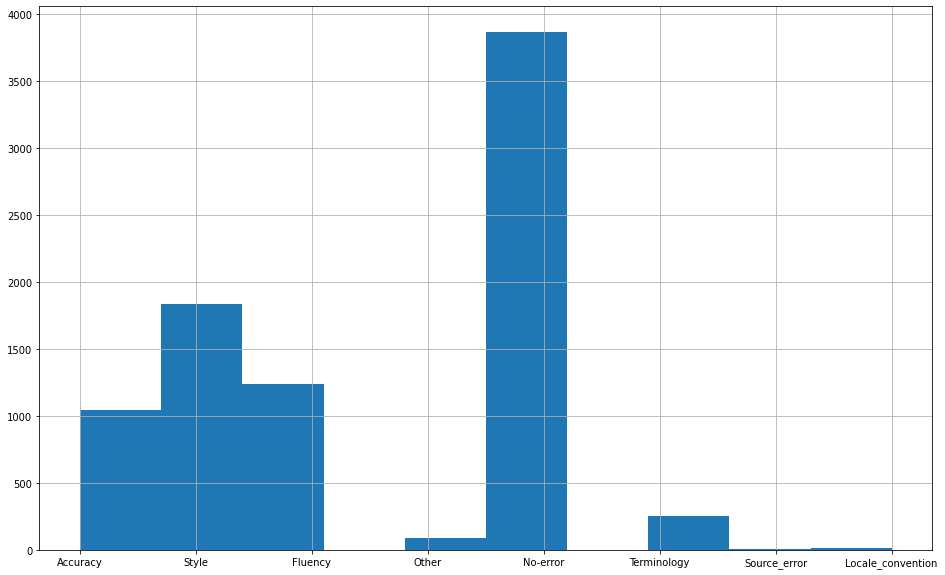

In [83]:
full_mqm21_df.supercategory.hist(figsize=(16, 10))

In [94]:
# full_mqm21_df.drop_duplicates(subset=['mt_output'])
for c in full_mqm21_df.supercategory.unique():
    suf = ''
    if not ('error' in c):
        suf = '_error'
    full_mqm21_df[c+suf] = full_mqm21_df.supercategory.apply(lambda x: 1 if x == c else 0)

In [95]:
mqm21_sub_df = full_mqm21_df[full_mqm21_df.supercategory.isin(['Fluency','Terminology','Style',
                                                               'No-error','Accuracy'])]

In [97]:
mqm21_sub_df = mqm21_sub_df[['mt_output', 'reference', 'z_mqm_score', 'Fluency_error', 'Terminology_error', 
                             'Style_error', 'No-error', 'Accuracy_error', 'severity']]
mqm21_sub_df

,mt_output,reference,z_mqm_score,Fluency_error,Terminology_error,Style_error,No-error,Accuracy_error,severity
0,"Paar MACED im kalifornischen Hundepark, weil e...",Angriff mit Pfefferspray auf ein Paar in einem...,-0.013807,0,0,0,0,1,Major
1,"Paar MACED im kalifornischen Hundepark, weil e...",Angriff mit Pfefferspray auf ein Paar in einem...,-0.858404,0,0,0,0,1,Major
2,Paar MACED im kalifornischen Hundepark für das...,Angriff mit Pfefferspray auf ein Paar in einem...,-1.182732,0,0,1,0,0,Minor
3,Paar MACED im kalifornischen Hundepark für das...,Angriff mit Pfefferspray auf ein Paar in einem...,-1.182732,0,0,0,0,1,Major
4,Paar MACED in Kalifornien Hundepark für nicht ...,Angriff mit Pfefferspray auf ein Paar in einem...,-0.561254,0,0,0,0,1,Major
...,...,...,...,...,...,...,...,...,...
8345,"Wiley, bekannt als Godfather of Grime und mit ...","Wiley, bekannt als „Godfather of Grime“, desse...",0.342346,0,0,1,0,0,Minor
8346,"Wiley, bekannt als der Pate des Schmutzes und ...","Wiley, bekannt als „Godfather of Grime“, desse...",0.080083,0,0,1,0,0,Major
8347,"Wiley, bekannt als Godfather of Grime und mit ...","Wiley, bekannt als „Godfather of Grime“, desse...",0.709702,0,0,0,1,0,No-error
8348,"Wiley, bekannt als Godfather of Grime und mit ...","Wiley, bekannt als „Godfather of Grime“, desse...",0.326909,0,0,0,1,0,No-error


In [98]:
mqm21_sub_df.reset_index(drop=True, inplace=True)

#### Useful functions:
1. `tokenizer.encode` ~ `self.convert_tokens_to_ids(self.tokenize(text))`

2. `tokenizer.encode_plus` function combines multiple steps for us:
    - Split the sentence into tokens. 
    - Add the special [CLS] and [SEP] tokens. 
    - Map the tokens to their IDs. 
    - Pad or truncate all sentences to the same length. 
    - Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.

### Prepare data

In [9]:
import torch
from transformers import AutoTokenizer

# Load the tokenizer for the BERT model.
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Create The Dataset Class.
class TheDataset(torch.utils.data.Dataset):

    def __init__(self, trans, refs, scores, tokenizer, max_len=tokenizer.model_max_length):
        self.trans = trans
        self.refs = refs
        self.scores = scores
        self.tokenizer  = tokenizer
        self.max_len    = max_len
  
    def __len__(self):
        if not (len(self.trans) == len(self.refs) == len(self.scores)):
            raise Exception('Number of translations, reference sentences and corresponding scores should be the same!')
        return len(self.trans)
  
    def __getitem__(self, index):
        tran = str(self.trans[index])
        ref = str(self.refs[index])
        score = self.scores[index]

        encoded_input = self.tokenizer.encode_plus(
            tran, ref,
            add_special_tokens    = True,
            max_length            = self.max_len,
            return_token_type_ids = False,
            return_attention_mask = True,
            return_tensors        = "pt",
            padding               = "max_length",
            truncation            = True
        )

        return {
            'input_ids': encoded_input['input_ids'][0],
            'attention_mask': encoded_input['attention_mask'][0],
            'labels': torch.tensor(score, dtype=torch.float32)
        }


In [7]:
dataset = pd.DataFrame({'translation': mt_snts_15 + mt_snts_16, 
                        'reference': ref_snts_15 + ref_snts_16, 
                        'score': da_scores_15 + da_scores_16})
dataset = dataset.sample(frac=1).reset_index(drop=True, random_state=1)

train_set = dataset[0:800]
valid_set = dataset[800:960]
test_set  = dataset[960:1060]

<AxesSubplot:>

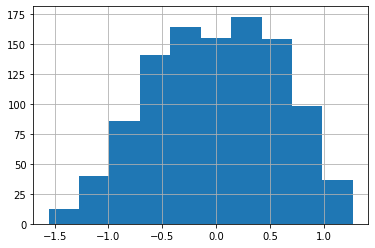

In [8]:
dataset.score.hist()

In [ ]:
# Create Dataset objects for train/validation sets.
train_set_dataset = TheDataset(
    trans    = train_set.translation.tolist(),
    refs     = train_set.reference.tolist(),
    scores   = train_set.score.tolist(),
    tokenizer  = tokenizer,
    max_len    = 150,
)

valid_set_dataset = TheDataset(
    trans    = valid_set.translation.tolist(),
    refs     = valid_set.reference.tolist(),
    scores   = valid_set.score.tolist(),
    tokenizer  = tokenizer,
    max_len    = 150,
)

### Finetune

In [7]:
from transformers import AutoModelForSequenceClassification

# num_labels = 1 for regression
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=1) 
# model = AutoModelForSequenceClassification.from_pretrained("./models/checkpoint-475_bs32_no_warmup_epochs20", 
#                                                            num_labels=1)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [36]:
for name, param in model.bert.named_parameters():
    if not name.startswith('pooler'):
        param.requires_grad = False

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
def compute_reg_metrics(pred):
    scores = pred.label_ids
    preds = pred.predictions.argmax(-1)
    r2 = r2_score(scores, preds)
    mse = mean_squared_error(scores, preds)
    return {
        'mean squared error': mse,
        'r2_score': r2,
    }

In [38]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(
    output_dir                  = "./models",
    num_train_epochs            = 5,
    per_device_train_batch_size = 32,
    per_device_eval_batch_size  = 32,
    warmup_steps                = 10,
    weight_decay                = 0.01,
    save_strategy               = "epoch",
    evaluation_strategy         = "steps"
)

trainer = Trainer(
    model           = model,
    args            = training_args,
    train_dataset   = train_set_dataset,
    eval_dataset    = valid_set_dataset,
    compute_metrics = compute_reg_metrics
)

trainer.train()

using `logging_steps` to initialize `eval_steps` to 500
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/home/ira/anaconda3/envs/eval_metrics/lib/python3.7/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 800
  Num Epochs = 5
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 125


Step,Training Loss,Validation Loss


Saving model checkpoint to ./models/checkpoint-25
Configuration saved in ./models/checkpoint-25/config.json
Model weights saved in ./models/checkpoint-25/pytorch_model.bin
Saving model checkpoint to ./models/checkpoint-50
Configuration saved in ./models/checkpoint-50/config.json
Model weights saved in ./models/checkpoint-50/pytorch_model.bin
Saving model checkpoint to ./models/checkpoint-75
Configuration saved in ./models/checkpoint-75/config.json
Model weights saved in ./models/checkpoint-75/pytorch_model.bin
Saving model checkpoint to ./models/checkpoint-100
Configuration saved in ./models/checkpoint-100/config.json
Model weights saved in ./models/checkpoint-100/pytorch_model.bin
Saving model checkpoint to ./models/checkpoint-125
Configuration saved in ./models/checkpoint-125/config.json
Model weights saved in ./models/checkpoint-125/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=125, training_loss=0.20317349243164062, metrics={'train_runtime': 1341.9825, 'train_samples_per_second': 2.981, 'train_steps_per_second': 0.093, 'total_flos': 308330499600000.0, 'train_loss': 0.20317349243164062, 'epoch': 5.0})

In [46]:
# Load the checkpoint
model = AutoModelForSequenceClassification.from_pretrained("./models_new/checkpoint-650", num_labels=1)

# Make the test set ready
test_set_dataset = TheDataset(
    trans    = test_set.translation.tolist(),
    refs     = test_set.reference.tolist(),
    scores   = test_set.score.tolist(),
    tokenizer  = tokenizer,
    max_len    = 150,
)

training_args = TrainingArguments(
    output_dir = "./models_new",
    do_predict = True, 
)

trainer = Trainer(
    model           = model,
    args            = training_args,
    compute_metrics = compute_reg_metrics,
)

res = trainer.predict(test_set_dataset)

loading configuration file ./models_new/checkpoint-650/config.json
Model config BertConfig {
  "_name_or_path": "./models_new/checkpoint-650",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "regression",
  "torch_dtype": "float32",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file ./models_new/checkpoint-650/pytorch_model.bin
All model checkpoint weights were used when

In [47]:
pred_true_score_df = test_set[['score']]
pred_true_score_df['preds'] = res.predictions

pred_true_score_df.corr()

/home/ira/anaconda3/envs/eval_metrics/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,score,preds
score,1.000000,0.620806
preds,0.620806,1.000000


The best obtained scores:    
0.613269 (450) --> 0.613167 (500)     
0.620806 (650) --> 0.622908 (700) --> 0.622965 (750)

## Classification with labels = MQM scores

In [108]:
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score 

In [109]:
mqm21_sub_df.columns

Index(['mt_output', 'reference', 'z_mqm_score', 'Fluency_error',
       'Terminology_error', 'Style_error', 'No-error', 'Accuracy_error',
       'severity'],
      dtype='object')

In [110]:
N_labels = 5
LABEL_COLUMNS = list(mqm21_sub_df.columns[3:8])
LABEL_COLUMNS

['Fluency_error',
 'Terminology_error',
 'Style_error',
 'No-error',
 'Accuracy_error']

In [111]:
class TranslationClsfDataset(torch.utils.data.Dataset):
    def __init__(self, data: pd.DataFrame, tokenizer, max_token_len: int = 128):
        self.tokenizer = tokenizer
        self.data = data
        self.max_token_len = max_token_len

    
    def __len__(self):
        return len(self.data)

    
    def __getitem__(self, index: int):
        data_row = self.data.iloc[index]
        tran = data_row.mt_output
        ref = data_row.reference
        labels = data_row[LABEL_COLUMNS]

        encoding = self.tokenizer.encode_plus(
            tran, ref,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
            padding="max_length",
            truncation=True,
        )
    
        return dict(
            mt_output=tran,
            input_ids=encoding["input_ids"].flatten(),
            attention_mask=encoding["attention_mask"].flatten(),
            labels=torch.FloatTensor(labels)
        )

In [128]:
def compute_class_metrics(pred):
    labels = pred.label_ids.argmax(-1)
    preds = pred.predictions.argmax(-1)
    print(f'labels: {labels}, predictions: {preds}')
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='micro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [114]:
mqm21_sub_df = mqm21_sub_df.sample(frac=1, random_state=1).reset_index(drop=True)

idx1 = int(len(mqm21_sub_df) * 0.8)
idx2 = int(len(mqm21_sub_df) * 0.9)

train_set = mqm21_sub_df[0:idx1]
valid_set = mqm21_sub_df[idx1:idx2]
test_set  = mqm21_sub_df[idx2:]

In [115]:
# Create Dataset objects for train/validation sets.
train_set_dataset = TranslationClsfDataset(
    data   = train_set,
    tokenizer  = tokenizer,
    max_token_len    = 150,
)

valid_set_dataset = TranslationClsfDataset(
    data   = valid_set,
    tokenizer  = tokenizer,
    max_token_len    = 150,
)

In [118]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)
for name, param in model.bert.named_parameters():
    if not name.startswith('pooler'):
        param.requires_grad = False

# Train        
training_args = TrainingArguments(
    output_dir                  = "./models_class",
    num_train_epochs            = 2,
    per_device_train_batch_size = 32,
    per_device_eval_batch_size  = 32,
    warmup_steps                = 50,
    weight_decay                = 0.01,
    save_strategy               = "epoch",
    evaluation_strategy         = "steps"
)

trainer = Trainer(
    model           = model,
    args            = training_args,
    train_dataset   = train_set_dataset,
    eval_dataset    = valid_set_dataset,
    compute_metrics = compute_class_metrics
)

trainer.train()

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /home/ira/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12

Step,Training Loss,Validation Loss


Saving model checkpoint to ./models_class/checkpoint-206
Configuration saved in ./models_class/checkpoint-206/config.json
Model weights saved in ./models_class/checkpoint-206/pytorch_model.bin
Saving model checkpoint to ./models_class/checkpoint-412
Configuration saved in ./models_class/checkpoint-412/config.json
Model weights saved in ./models_class/checkpoint-412/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=412, training_loss=0.4442900129892294, metrics={'train_runtime': 3930.72, 'train_samples_per_second': 3.353, 'train_steps_per_second': 0.105, 'total_flos': 1015985483694000.0, 'train_loss': 0.4442900129892294, 'epoch': 2.0})

In [129]:
# Load the checkpoint
model = AutoModelForSequenceClassification.from_pretrained("./models_class/checkpoint-412", num_labels=5)

# Make the test set ready
test_set_dataset = TranslationClsfDataset(
    data   = test_set,
    tokenizer  = tokenizer,
    max_token_len    = 150,
)

training_args = TrainingArguments(
    output_dir = "./models_class",
    do_predict = True, 
)

trainer = Trainer(
    model           = model,
    args            = training_args,
    compute_metrics = compute_class_metrics,
)

res = trainer.predict(test_set_dataset)

loading configuration file ./models_class/checkpoint-412/config.json
Model config BertConfig {
  "_name_or_path": "./models_class/checkpoint-412",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "multi_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.17.0",
  "type_

labels: [0 3 4 0 4 3 4 3 3 0 0 3 3 4 3 1 1 3 3 3 3 3 3 2 4 0 3 0 4 3 3 2 2 3 3 0 3
 3 3 0 2 3 2 3 4 4 3 3 3 3 2 3 3 2 3 2 3 4 0 2 0 3 3 3 3 3 2 2 3 3 0 3 0 3
 2 3 4 2 1 2 4 3 2 4 3 3 0 4 4 3 3 4 3 2 0 3 4 4 2 3 3 3 3 3 2 2 2 0 0 1 2
 2 2 4 3 2 3 3 2 3 3 3 0 3 2 4 4 3 0 0 3 3 4 0 3 2 1 0 2 4 3 3 3 0 3 0 0 2
 3 3 0 3 2 2 3 2 2 2 0 4 3 0 3 2 2 4 2 0 3 3 0 3 2 3 4 1 2 1 2 3 3 3 2 3 2
 0 2 2 1 3 3 4 3 0 3 3 2 0 2 3 2 3 3 3 3 3 0 4 2 3 4 3 0 4 4 0 3 3 3 2 2 3
 3 4 3 3 0 3 2 3 2 0 3 3 4 4 4 0 0 2 4 4 3 1 4 3 3 4 2 0 4 2 3 2 2 0 2 3 2
 2 0 3 3 3 4 2 3 2 2 3 3 3 2 3 2 3 3 3 3 2 0 3 2 0 0 3 3 3 4 3 3 2 3 2 3 3
 2 0 2 3 3 2 0 2 4 1 4 2 4 3 0 3 0 0 3 3 0 3 3 3 4 3 3 3 2 0 3 2 3 3 3 2 2
 3 4 0 0 2 2 2 2 2 3 4 3 2 0 2 2 0 2 3 3 3 3 3 2 3 0 4 4 3 2 3 0 4 4 2 3 0
 3 0 2 3 2 0 3 4 3 1 3 0 2 0 3 3 3 0 3 3 3 4 0 2 2 3 0 2 2 4 3 3 4 3 2 3 3
 0 2 3 3 1 3 4 3 3 1 2 3 3 2 3 2 3 3 3 3 4 2 1 0 2 3 3 3 3 3 2 0 2 3 3 3 3
 4 2 3 0 3 3 3 3 3 3 2 4 3 2 3 3 2 3 4 3 0 3 3 4 0 0 3 3 3 2 3 0 4 0 1 3 2
 3 2 2 3 3 3 3 3 

In [17]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# import torch
# from transformers import TrainingArguments, Trainer
# from transformers import BertTokenizer, BertForSequenceClassification
# from transformers import EarlyStoppingCallback


# # Read data
# data = pd.read_csv("train.csv")

# # Define pretrained tokenizer and model
# model_name = "bert-base-uncased"
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertForSequenceClassification.from_pretrained(model_name, num_labels=1)


# # ----- 1. Preprocess data -----#
# # Preprocess data
# X = list(data["review"])
# y = list(data["sentiment"])
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
# X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

# # Create torch dataset
# class Dataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels=None):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         if self.labels:
#             item["labels"] = torch.tensor(self.labels[idx])
#         return item

#     def __len__(self):
#         return len(self.encodings["input_ids"])

# train_dataset = Dataset(X_train_tokenized, y_train)
# val_dataset = Dataset(X_val_tokenized, y_val)

# # ----- 2. Fine-tune pretrained model -----#
# # Define Trainer parameters
# def compute_metrics(p):
#     pred, labels = p
#     pred = np.argmax(pred, axis=1)

#     accuracy = accuracy_score(y_true=labels, y_pred=pred)
#     recall = recall_score(y_true=labels, y_pred=pred)
#     precision = precision_score(y_true=labels, y_pred=pred)
#     f1 = f1_score(y_true=labels, y_pred=pred)

#     return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# # Define Trainer
# args = TrainingArguments(
#     output_dir="output",
#     evaluation_strategy="steps",
#     eval_steps=500,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=3,
#     seed=0,
#     load_best_model_at_end=True,
# )
# trainer = Trainer(
#     model=model,
#     args=args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     compute_metrics=compute_metrics,
#     callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
# )

# # Train pre-trained model
# trainer.train()

# # ----- 3. Predict -----#
# # Load test data
# test_data = pd.read_csv("test.csv")
# X_test = list(test_data["review"])
# X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512)

# # Create torch dataset
# test_dataset = Dataset(X_test_tokenized)

# # Load trained model
# model_path = "output/checkpoint-50000"
# model = BertForSequenceClassification.from_pretrained(model_path, num_labels=1)

# # Define test trainer
# test_trainer = Trainer(model)

# # Make prediction
# raw_pred, _, _ = test_trainer.predict(test_dataset)

# # Preprocess raw predictions
# y_pred = np.argmax(raw_pred, axis=1)